In [1]:
import pandas as pd

In [2]:
# Load of all .csv
df_ubereats_centro = pd.read_csv(r'csv/ubereats-pizza-centro.csv')
df_ubereats_alamos = pd.read_csv(r'csv/ubereats-pizza-alamos.csv')
df_ubereats_juriquilla = pd.read_csv(r'csv/ubereats-pizza-juriquilla.csv')
df_ubereats_milenio = pd.read_csv(r'csv/ubereats-pizza-milenio.csv')
df_ubereats_refugio = pd.read_csv(r'csv/ubereats-pizza-refugio.csv')

df_ubereats_balvanera = pd.read_csv(r'csv/ubereats-pizza-balvanera.csv')
df_ubereats_campanario = pd.read_csv(r'csv/ubereats-pizza-campanario.csv')
df_ubereats_cerritocolorado = pd.read_csv(r'csv/ubereats-pizza-cerritocolorado.csv')
df_ubereats_cimatario = pd.read_csv(r'csv/ubereats-pizza-cimatario.csv')
df_ubereats_el_pueblito = pd.read_csv(r'csv/ubereats-pizza-el-pueblito.csv')

df_rappi_centro = pd.read_csv(r'csv/rappi-pizza-centro.csv')
df_rappi_alamos = pd.read_csv(r'csv/rappi-pizza-alamos.csv')
df_rappi_juriquilla = pd.read_csv(r'csv/rappi-pizza-juriquilla.csv')
df_rappi_milenio = pd.read_csv(r'csv/rappi-pizza-milenio.csv')
df_rappi_refugio = pd.read_csv(r'csv/rappi-pizza-refugio.csv')

df_rappi_balvanera = pd.read_csv(r'csv/rappi-pizza-balvanera.csv')
df_rappi_campanario = pd.read_csv(r'csv/rappi-pizza-campanario.csv')
df_rappi_cerritocolorado = pd.read_csv(r'csv/rappi-pizza-cerritocolorado.csv')
df_rappi_cimatario = pd.read_csv(r'csv/rappi-pizza-cimatario.csv')
df_rappi_el_pueblito = pd.read_csv(r'csv/rappi-pizza-el-pueblito.csv')

frames = [
    df_ubereats_centro, 
    df_ubereats_alamos, 
    df_ubereats_juriquilla, 
    df_ubereats_milenio, 
    df_ubereats_refugio, 
    df_ubereats_balvanera, 
    df_ubereats_campanario, 
    df_ubereats_cerritocolorado, 
    df_ubereats_cimatario, 
    df_ubereats_el_pueblito, 
    df_rappi_centro, 
    df_rappi_alamos, 
    df_rappi_juriquilla, 
    df_rappi_milenio, 
    df_rappi_refugio, 
    df_rappi_balvanera, 
    df_rappi_campanario, 
    df_rappi_cerritocolorado, 
    df_rappi_cimatario, 
    df_rappi_el_pueblito]

# We concat all frames and ignore the current index to generate a new one
df = pd.concat(frames, ignore_index=True)

In [3]:
print('Size of the df: {} items'.format(df.count()['name']))

Size of the df: 38876 items


In [4]:
# Note that the price-food has MX$
df.loc[:,['name','rating','evals','name-food','price-food','colonia']]

,name,rating,evals,name-food,price-food,colonia
0,Di Vino,4.5,(64),Lasagna a la boloñesa,$201.50,NaN
1,Diktatur (Guerrero),4.9,(10),Molletes de jamón,$60.00,NaN
2,The Zone Bread and Coffee,4.8,(26),Frappé,$50.00,NaN
3,Papa John's Pizza Jardines,4.7,(161),Hawaiiana,$249.00,NaN
4,Micaela Cocina & Café,4.8,(79),De panela,$175.00,NaN
...,...,...,...,...,...,...
38907,Trapani Pizza,4.8,NaN,Sangria Señorial 355 ml,25,pueblito
38908,Il Pizzaiolo Qro,4.2,NaN,Pasta Amatriciana,119,pueblito
38909,Pizza Riko,NaN,NaN,Dedos de Queso,97,pueblito
38910,Estacion 19,NaN,NaN,Cappuccino,52,pueblito


In [5]:
# Remove MX$ from price-food
df['price-food'] = df['price-food'].apply(lambda x: (float(x[3:] if x[0] == 'M' else x[1:]) if not isinstance(x, int) else float(x)) if not isinstance(x, float) else x)

# for index, row in df.iterrows():
#     print(float(row['price-food'][3:]) if not isinstance(row['price-food'], float) else row['price-food'])

In [6]:
df.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
0,Di Vino,Lasagna a la boloñesa,201.5,NaN
1,Diktatur (Guerrero),Molletes de jamón,60.0,NaN
2,The Zone Bread and Coffee,Frappé,50.0,NaN
3,Papa John's Pizza Jardines,Hawaiiana,249.0,NaN
4,Micaela Cocina & Café,De panela,175.0,NaN
...,...,...,...,...
38907,Trapani Pizza,Sangria Señorial 355 ml,25.0,pueblito
38908,Il Pizzaiolo Qro,Pasta Amatriciana,119.0,pueblito
38909,Pizza Riko,Dedos de Queso,97.0,pueblito
38910,Estacion 19,Cappuccino,52.0,pueblito


In [7]:
# Get all "pizza" dataframes
dfPizzas = df[df['name-food'].str.contains("pizza", na=False, case=False)]
dfPizzas.reset_index(drop=True, inplace=True)
dfPizzas.loc[:,['name','name-food','price-food']]

,name,name-food,price-food
0,Güero's Pizza,Pizza Especial Americana - Mediana,303.0
1,Di Vino,Pizza Hawaiana,199.0
2,Che-Chelas,Pizza blanca,160.0
3,Cheeseup pizza,PIZZA EN PAREJA,189.0
4,Lynchburg,Pizza Hawaiana,179.0
...,...,...,...
7790,Estacion 19,Pizza Pompere,114.0
7791,Trapani Pizza,Combo 2 Pizzas Grandes,268.0
7792,Piu Pizza,Pizza Salami,120.0
7793,Mi Piace Pizza Qro,Pizza Hawaiana,125.0


In [8]:
minPizza = dfPizzas.loc[dfPizzas['price-food'] == dfPizzas['price-food'].min()]

print('The pizzas with the lower price are:')
minPizza.loc[:,['name','name-food','price-food']]

The pizzas with the lower price are:


,name,name-food,price-food
163,Lecaroz (QUERETARO),Base de pizza individual,15.0
1680,Lecaroz (QUERETARO),Base de pizza individual,15.0
3933,Lecaroz (Mompani),Base de pizza individual,15.0
4839,Lecaroz (QUERETARO),Base de pizza individual,15.0


In [9]:
maxPizza = dfPizzas.loc[dfPizzas['price-food'] == dfPizzas['price-food'].max()]

print('The pizzas with the greatest price are:')
maxPizza.loc[:,['name','name-food','price-food']]

The pizzas with the greatest price are:


,name,name-food,price-food
2171,Wohoo! Desayunos Sorpresa,Pizza box,860.0


In [10]:
meanPizzaVal = dfPizzas['price-food'].mean()
meanPizza = dfPizzas.loc[dfPizzas['price-food'] == meanPizzaVal]

print(f'The mean price is ${meanPizzaVal}:')
meanPizza.loc[:,['name','name-food','price-food']]

The mean price is $175.79896454265162:


,name,name-food,price-food


In [11]:
medianPizza = dfPizzas.loc[dfPizzas['price-food'] == dfPizzas['price-food'].median()]

print('The pizzas with the median price are:')
medianPizza.loc[:,['name','name-food','price-food']]

The pizzas with the median price are:


,name,name-food,price-food
22,Ipanema Pizza Buffete,Pizza de Cajeta Helado,175.0
61,Pizza TEC Biagio,Pizza Mexico Grande,175.0
63,Los Dogos (Puerta La Victoria),Pizza Burger,175.0
77,TOSCANO PIZZA & ESPRESSOS,Pizza máxima,175.0
85,Ipanema Pizza Buffete,Pizza Calabresa,175.0
...,...,...,...
7330,Piacere Italiano,Pizza Capricciosa,175.0
7340,La Piccola Italia,Pizza Calzone Champiñones,175.0
7362,Piu Pizza,Pizza con Frutos del Mar,175.0
7388,La Piccola Italia,Pizza La Piccola Italia,175.0


In [12]:
modePizza = dfPizzas.loc[dfPizzas['price-food'] == dfPizzas['price-food'].mode()[0]]

print('The pizzas with the mode price are:')
modePizza.loc[:,['name','name-food','price-food']]

The pizzas with the mode price are:


,name,name-food,price-food
3,Cheeseup pizza,PIZZA EN PAREJA,189.0
14,MAMBA Pizza Co. (Pie de la Cuesta),Pizza Azteca grande,189.0
31,Güero's Pizza,Pizza Italiana Chica,189.0
34,MAMBA Pizza Co. (Pie de la Cuesta),Pizza hawaiana grande,189.0
51,Sinatra 351,Pizza Meat Lover,189.0
...,...,...,...
7682,Pizza & More,Pizza Antojo,189.0
7732,Il Pizzaiolo Qro,II Pizzaiolo,189.0
7752,Pizza Rotonda,Pizza Di Mare,189.0
7773,Pizza & More,Arma tu Pizza 4 Ingredientes,189.0


In [13]:
import numpy
des = numpy.std(dfPizzas['price-food'])

print(des)

61.962512044386536


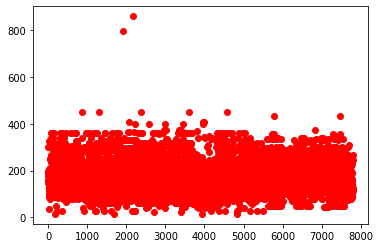

In [14]:
import matplotlib.pyplot as plt
plt.plot(dfPizzas['price-food'], 'ro')
plt.show()

In [15]:
# Get all "alamos" dataframes
dfAlamos = dfPizzas[dfPizzas['colonia'].str.contains("alamos", na=False, case=False)]
dfAlamos.reset_index(drop=True, inplace=True)
dfAlamos.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
0,Micaela Cocina & Café,Pizza De 4 Quesos y Jamón Serrano,220.0,alamos
1,Che-Chelas,Pizza de pepperoni,145.0,alamos
2,Alpaso Pizzeria,Pizza margarita,90.3,alamos
3,College Bar,Pizza Meat Lover,189.0,alamos
4,Ristorante Italiano Brancacci,Pizza Traviata,200.0,alamos
...,...,...,...,...
987,La Vieja Varsovia,Pizza Mediterránea,113.0,alamos
988,Trattoria La Nonna,Pizza Margherita,174.0,alamos
989,Tonino's Pizza,Pizza Combinada Mediana,161.0,alamos
990,Cheese Up,Pizza Italiana,155.0,alamos


In [16]:
meanPizzaAl = dfAlamos['price-food'].mean()
print(f'The mean price is ${meanPizzaAl}')

The mean price is $176.3359879032258


In [17]:
# Get all "refugio" dataframes
dfRefugio = dfPizzas[dfPizzas['colonia'].str.contains("refugio", na=False, case=False)]
dfRefugio.reset_index(drop=True, inplace=True)
dfRefugio.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
0,Mangiare,Pizza hawaiana,231.0,refugio
1,Pizza Puq,Pizza de salami,137.0,refugio
2,Sofía Pizzería Refugio,Pizza rucola,240.0,refugio
3,Sofía Pizzería Refugio,Pizza tropical,175.0,refugio
4,Pizza Fata,Pizza pepperoni lover,215.0,refugio
...,...,...,...,...
302,Pizza Puq,Pizza Salami Mediana,137.0,refugio
303,Tentazione Pizzas Artesanales,Pizza Monana,220.0,refugio
304,Lucciano's,Pizza Pepperoni,199.0,refugio
305,Pizza Puq,Pizza Aceitunas Mediana,187.0,refugio


In [18]:
meanPizzaRe = dfRefugio['price-food'].mean()
print(f'The mean price is ${meanPizzaRe}')

The mean price is $192.55559210526317


In [19]:
# Get all "milenio" dataframes
dfMilenio = dfPizzas[dfPizzas['colonia'].str.contains("milenio", na=False, case=False)]
#dfMilenio.reset_index(drop=True, inplace=True)
dfMilenio.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
2256,La Piccola Trattoria Querétaro,pizza parmigiana,229.0,milenio
2257,La piccola italia arcos,Pizza Capricciosa,165.0,milenio
2258,Henry Miner BBQ & Pizza,Pizza Miner,149.0,milenio
2259,Cosi Fan Tutte,Arma tu Pizza Personal,85.0,milenio
2260,Pizzería Alto Horno,Pizza Champiñón,135.0,milenio
...,...,...,...,...
6719,Pizzeta,Pizza Mixta,120.0,milenio
6720,Papa Johns,Pizza Alfredo Delight,319.0,milenio
6721,Abuelitas Pizza,Pizza Campirana,230.0,milenio
6722,lynchburg,Pizza de Pera,189.0,milenio


In [20]:
meanPizzaMi = dfMilenio['price-food'].mean()
print(f'The mean price is ${meanPizzaMi}')

The mean price is $178.9778624535316


In [21]:
# Get all "juriquilla" dataframes
dfJuriquilla = dfPizzas[dfPizzas['colonia'].str.contains("juriquilla", na=False, case=False)]
#dfJuriquilla.reset_index(drop=True, inplace=True)
dfJuriquilla.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
1847,URBAN WINGS & BEER,Micro pizzas,65.0,juriquilla
1848,Chedraui Selecto (Juriquilla),Pizza Pepperoni Grande Artesanal TO GO TAKE AN...,165.0,juriquilla
1849,Pizzeta Juriquilla,Pizza Pepperoni,100.0,juriquilla
1850,Pizzeta Juriquilla,Pizza Americana,105.0,juriquilla
1851,Sofía Pizzería Juriquilla,Pizza Italiana,195.0,juriquilla
...,...,...,...,...
6324,Pizzeta,Pizza Alemana,105.0,juriquilla
6325,El Hornero Pizzas y Empanadas,Pizza Hawaiana,140.0,juriquilla
6326,Yuyumei Pizzería Napolitana,Pizza Frutti Di Mare,265.0,juriquilla
6327,Bottega Pizzería Artesanal,Pizza Salumi Grande,235.0,juriquilla


In [22]:
meanPizzaJu = dfJuriquilla['price-food'].mean()
print(f'The mean price is ${meanPizzaJu}')

The mean price is $176.07762938230383


In [23]:
# Get all "pueblito" dataframes
dfPueblito = dfPizzas[dfPizzas['colonia'].str.contains("Pueblito", na=False, case=False)]
#dfPueblito.reset_index(drop=True, inplace=True)
dfPueblito.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
5222,Pizzeta (Chedraui Candiles),Pizza Cuaresma,110.0,pueblito
5223,Piacere Italiano,Pizza al Salmone,205.0,pueblito
5224,Boyos Pizza Candiles,Pizza Extra Peperoni Grande,169.0,pueblito
5225,Piacere Italiano,Pizza Hawaiana,165.0,pueblito
5226,BEPPE PIZZAS,Pizzas clásicas,184.0,pueblito
...,...,...,...,...
7790,Estacion 19,Pizza Pompere,114.0,pueblito
7791,Trapani Pizza,Combo 2 Pizzas Grandes,268.0,pueblito
7792,Piu Pizza,Pizza Salami,120.0,pueblito
7793,Mi Piace Pizza Qro,Pizza Hawaiana,125.0,pueblito


In [24]:
meanPizzaPu = dfPueblito['price-food'].mean()
print(f'The mean price is ${meanPizzaPu}')

The mean price is $163.49787234042554


In [25]:
# Get all "cimatario" dataframes
dfCimatario = dfPizzas[dfPizzas['colonia'].str.contains("cimatario", na=False, case=False)]
#dfCimatario.reset_index(drop=True, inplace=True)
dfCimatario.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
4294,Subway (Panamericana),Pizza Sub 30 cm,119.0,cimatario
4295,Pizzería Alto Horno,Pizza Española,150.0,cimatario
4296,La piccola italia centro,Pizza Viuda Negra,180.0,cimatario
4297,Pizzería Alto Horno,Pizza Diablo,135.0,cimatario
4298,Boyos Pizza,Pizza Vegetariana Grande,169.0,cimatario
...,...,...,...,...
7578,Tonino's Pizza,Pizza Vegetariana,208.0,cimatario
7579,Trattoria La Nonna,Pizza Vegetariana,165.0,cimatario
7580,Pizza Tec,Pizza Hawaiana,84.0,cimatario
7581,Diktatur,Pizza Monsiváis,50.0,cimatario


In [26]:
meanPizzaCi = dfCimatario['price-food'].mean()
print(f'The mean price is ${meanPizzaCi}')

The mean price is $179.02812407680946


In [27]:
# Get all "cerrito colorado" dataframes
dfCerrito = dfPizzas[dfPizzas['colonia'].str.contains("cerrito colorado", na=False, case=False)]
#dfCerrito.reset_index(drop=True, inplace=True)
dfCerrito.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
3700,Pizzeria L' Strega,Pizza de de la casa,229.0,cerrito colorado
3701,Giannino’s (Patio Querétaro),Pizza de Carnes Frias Mediana,160.0,cerrito colorado
3702,Nitto's Pizza & Hamburguesas,Pizza Camaron Grande,240.0,cerrito colorado
3703,Torino's Pizza,Pizza Hawaiana Tropical,80.0,cerrito colorado
3704,Little Rome Pizza,Pizza de especialidad,135.0,cerrito colorado
...,...,...,...,...
7152,Mi Cheve,Pizza de Carnes Frías,149.0,cerrito colorado
7153,Bastard Pizzas Burgers N Shakes,Pizza Boneless,209.0,cerrito colorado
7154,Mi Cheve,Pizza Norteña,139.0,cerrito colorado
7155,Mi Cheve,Pizza Maya,139.0,cerrito colorado


In [28]:
meanPizzaCc = dfCerrito['price-food'].mean()
print(f'The mean price is ${meanPizzaCc}')

The mean price is $148.33047895500727


In [29]:
# Get all "campanario" dataframes
dfCampanario = dfPizzas[dfPizzas['colonia'].str.contains("campanario", na=False, case=False)]
#dfCampanario.reset_index(drop=True, inplace=True)
dfCampanario.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
3207,Sofía Pizzería (Milenio 3),Pizza Veggie,170.0,campanario
3208,Pizzeta (Arcos),Pizza Jamón,100.0,campanario
3209,Ipanema Pizza Buffete,Pizza de Atún,175.0,campanario
3210,Gab’s,Pizza Chaikovski,200.0,campanario
3211,Ipanema Pizza Buffete,Pizza Kinder,185.0,campanario
...,...,...,...,...
7054,Domino's Pizza,Pizza Extra grande 5-9 Ingredientes,329.0,campanario
7055,Cardosanto Pizza,Pizza Portosanto,170.0,campanario
7056,Little Caesars,Paquete Pizza con Alitas,259.0,campanario
7057,Il Diavolo,Pizza San Daniele,297.0,campanario


In [30]:
meanPizzaCa = dfCampanario['price-food'].mean()
print(f'The mean price is ${meanPizzaCa}')

The mean price is $183.73896321070234


In [31]:
# Get all "balvanera" dataframes
dfBalvanera = dfPizzas[dfPizzas['colonia'].str.contains("balvanera", na=False, case=False)]
#dfCampanario.reset_index(drop=True, inplace=True)
dfBalvanera.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
3082,PANDINIS PIZZA,Pizza Hawaiana Especial Tamaño Grande,198.0,balvanera
3083,La neta alas y chelas,Pizza boloñesa,195.0,balvanera
3084,Pizza Rotonda,Pizza especial tropical,129.0,balvanera
3085,Benedetti's Pizza Amsterdam,Pizza Mediana Especialidad,238.0,balvanera
3086,PANDINIS PIZZA,Pizza Básica Tamaño Grande,129.0,balvanera
...,...,...,...,...
6948,Benedetti's,Pizza Pastor Especial,145.0,balvanera
6949,Nápoles Artesanal Pizzería,Pizza Napoli,245.0,balvanera
6950,Nápoles Artesanal Pizzería,Pizza 4 Quesos,254.0,balvanera
6951,Mi Piace Pizza Qro,Pizza Jamón Serrano,180.0,balvanera


In [32]:
meanPizzaBa = dfBalvanera['price-food'].mean()
print(f'The mean price is ${meanPizzaBa}')

The mean price is $172.1778947368421


In [33]:
# Get all "centro" dataframes
dfCentro = dfPizzas[dfPizzas['colonia'].str.contains("centro", na=True, case=False)]
#dfCampanario.reset_index(drop=True, inplace=True)
dfCentro.loc[:,['name','name-food','price-food','colonia']]

,name,name-food,price-food,colonia
0,Güero's Pizza,Pizza Especial Americana - Mediana,303.0,NaN
1,Di Vino,Pizza Hawaiana,199.0,NaN
2,Che-Chelas,Pizza blanca,160.0,NaN
3,Cheeseup pizza,PIZZA EN PAREJA,189.0,NaN
4,Lynchburg,Pizza Hawaiana,179.0,NaN
...,...,...,...,...
6009,Mamba Pizza Co.,Pizza Familiar Mamba Tropical,239.0,centro
6010,La Piccola Trattoria,Pizza Fiordilatte,239.0,centro
6011,Pizzeta,Pizza Mexicana,115.0,centro
6012,Trattoria La Nonna,Pizza Vegetariana,165.0,centro


In [34]:
meanPizzaCe = dfCentro['price-food'].mean()
print(f'The mean price is ${meanPizzaCe}')

The mean price is $181.59377997179126


<BarContainer object of 10 artists>

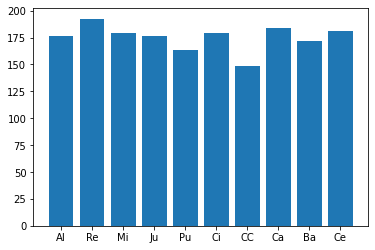

In [35]:
import matplotlib.pyplot as plt1
plt1.bar(['Al','Re','Mi', 'Ju', 'Pu', 'Ci', 'CC','Ca','Ba', 'Ce'],
       [meanPizzaAl,meanPizzaRe,meanPizzaMi,meanPizzaJu,meanPizzaPu,meanPizzaCi,meanPizzaCc,meanPizzaCa,meanPizzaBa,meanPizzaCe])